In [1]:
from google.colab import drive
drive.mount('/content/drive/')

print("Google Drive mounted successfully")

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive/
Google Drive mounted successfully


In [0]:
import matplotlib.pyplot as plt
import matplotlib
import os
import numpy as np
import cv2

In [0]:
path1 = "/content/drive/My Drive/Dataset/Good"
path2 = "/content/drive/My Drive/Dataset/Defects"

listing1 = os.listdir(path1)
listing2 = os.listdir(path2)

In [0]:
# Loading the image dataset into a array for further processing. Also, converting them to a resolution of 256x256. 
#The images are of 4160x3120 resolution. Working on these images will be computationally expensive and takes more time to tune the model

Good = []
Defects = []
for lm in listing1:
  img = cv2.imread(path1+'/'+lm)  
  Good.append(cv2.resize(img, (256,256), interpolation = cv2.INTER_AREA))


for lm in listing2:
  img = cv2.imread(path2+'/'+lm)  
  Defects.append(cv2.resize(img, (256,256), interpolation = cv2.INTER_AREA))

In [5]:
# Verifying the shape/resolution of Healthy images after loading into the array

Good = np.array(Good)
for i in range(10):
  print(Good[i].shape)

(256, 256, 3)
(256, 256, 3)
(256, 256, 3)
(256, 256, 3)
(256, 256, 3)
(256, 256, 3)
(256, 256, 3)
(256, 256, 3)
(256, 256, 3)
(256, 256, 3)


In [6]:
# Verifying the shape/resolution of Defective Apron images after loading into the array

Defects = np.array(Defects)
print(Good.shape, Defects.shape)

(139, 256, 256, 3) (111, 256, 256, 3)


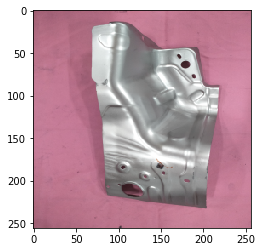

In [7]:
# Verifying the images by plotting

plt.imshow(Good[10], cmap='gray')

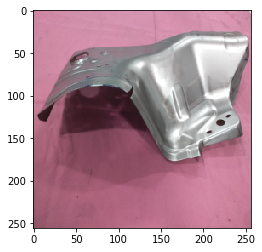

In [8]:
# Verifying the images by plotting

plt.imshow(Defects[10], cmap='gray')

In [10]:
#Combined both Good samples and Defective samples to form the dataset

Dataset = np.append(Good, Defects, axis=0)
print(Dataset.shape)

(250, 256, 256, 3)


Converted the dataset into a fixed resolution of 256x256. Now, we have 250 images to work on - which is a small number.

**Choosing the model/Algorithm:** The input to the model is an image, so a CNN is better suited to work with an image as it preserves spatial correlation of pixels and also reduces the number of weights and computational power required as it works on a bunch of pixels rather than each pixel(done in MLP).

**Why deep learning instead of classical ML?** Neural networks are known to understand the images better and can produce high accuracy on models taking images as input. None of the classic ML algorithms are known to work better with images when compared to CNNs.
Also, in order to use classic ML, the image needs to be converted into 1D array. This step will result in loss of information present in the adjacent pixels.

Deep Learning models are data hungry - need more data. 

**Solution1:** Data Augmentation - converting 250 odd samples into 2500 samples by using slight rotations, flip, slight change in brightness/intensity levels, etc..

**Solution2:** Transfer Learning - use model that is trained on different but a similar problem

**Solution3:** A combination of Solution1 and Solution2

In [11]:
# Labelling the data for each class
# Assign label of 0 to Good Apron and label of 1 to Defective samples

Label = np.ones(Dataset.shape[0])
Label[0:139] = 0 

# Verify if the labels are correctly assigned
print(Label[138], Label[139])

0.0 1.0


1.0


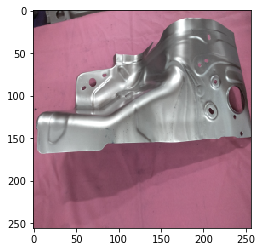

In [12]:
#Shuffle the dataset and check if the label was correctly assigned

from sklearn.utils import shuffle

Dataset, Label = shuffle(Dataset, Label, random_state= 35)
print(Label[25])
plt.imshow(Dataset[25])

In [0]:
#Reshaping into a 4D tensor and normalizing the dataset - Neural networks perform better on data ranging from 0 to 1.

Dataset = Dataset.reshape(-1, 256, 256, 3)
Dataset = Dataset.astype('float32')
Dataset = Dataset/255.

Let's try to build the model with the available data i.e 250 images and use this to compare the results obtained from Data Augmentation.

In [65]:
#Split the data into training, validation and testing set

from sklearn.model_selection import train_test_split

X_train,X_val,Y_train,Y_val = train_test_split(Dataset,Label,test_size=0.20,random_state=34)

X_train, X_test, Y_train, Y_test = train_test_split(X_train, Y_train, test_size=0.20, random_state=45)

print(X_train.shape, X_test.shape, X_val.shape)

(160, 256, 256, 3) (40, 256, 256, 3) (50, 256, 256, 3)


Split the data into 160 samples of training data, 50 samples of validation data and 40 samples of testing data

In [0]:
#training the model using LeNET Architecture.

import tensorflow as tf
import keras
from keras.models import Sequential
from keras.layers import Dense, Conv2D, Flatten, AveragePooling2D

learning_rate=0.001
BATCH_SIZE = 16
num_classes = 2

#LeNET Architecture

model = keras.Sequential()
model.add(Conv2D(filters=6, kernel_size=(3, 3), activation='relu', input_shape=(256,256,3)))
model.add(AveragePooling2D())   
model.add(Conv2D(filters=16, kernel_size=(3, 3), activation='relu'))
model.add(AveragePooling2D())
model.add(Flatten())
model.add(Dense(units=120, activation='relu'))
model.add(Dense(units=60, activation='relu'))
model.add(Dense(units=1, activation = 'sigmoid'))      


#Defining the loss function and optimizers
model.compile(loss='binary_crossentropy', optimizer='Adam', metrics=['accuracy'])


In [71]:
model.summary()

Model: "sequential_10"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_22 (Conv2D)           (None, 254, 254, 6)       168       
_________________________________________________________________
average_pooling2d_22 (Averag (None, 127, 127, 6)       0         
_________________________________________________________________
conv2d_23 (Conv2D)           (None, 125, 125, 16)      880       
_________________________________________________________________
average_pooling2d_23 (Averag (None, 62, 62, 16)        0         
_________________________________________________________________
flatten_10 (Flatten)         (None, 61504)             0         
_________________________________________________________________
dense_28 (Dense)             (None, 120)               7380600   
_________________________________________________________________
dense_29 (Dense)             (None, 60)              

In [72]:
#Defined callback function to stop the training after the training accuracy reached 98%. This is a step taken to avoid overfitting to some extent.
#This is called early stopping

class myCallback(tf.keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs={}):
    if(logs.get('acc')==0.98):
      print("\nReached 98% accuracy so cancelling training!")
      self.model.stop_training = True

callbacks = myCallback()

#train the model
result = model.fit(X_train, Y_train, validation_data=(X_val, Y_val), epochs=20, batch_size=BATCH_SIZE, callbacks=[callbacks])

Train on 160 samples, validate on 50 samples
Epoch 1/20
160/160 [==============================] - 8s 50ms/step - loss: 1.4815 - acc: 0.4875 - val_loss: 0.6859 - val_acc: 0.5400
Epoch 2/20
160/160 [==============================] - 6s 40ms/step - loss: 0.6912 - acc: 0.6063 - val_loss: 0.6863 - val_acc: 0.6200
Epoch 3/20
160/160 [==============================] - 6s 40ms/step - loss: 0.6531 - acc: 0.6312 - val_loss: 0.7042 - val_acc: 0.5400
Epoch 4/20
160/160 [==============================] - 6s 40ms/step - loss: 0.6695 - acc: 0.5438 - val_loss: 0.6787 - val_acc: 0.5600
Epoch 5/20
160/160 [==============================] - 6s 40ms/step - loss: 0.6001 - acc: 0.7875 - val_loss: 0.6817 - val_acc: 0.6200
Epoch 6/20
160/160 [==============================] - 6s 40ms/step - loss: 0.5492 - acc: 0.7125 - val_loss: 0.6692 - val_acc: 0.5800
Epoch 7/20
160/160 [==============================] - 7s 41ms/step - loss: 0.4552 - acc: 0.8500 - val_loss: 0.8314 - val_acc: 0.5600
Epoch 8/20
160/160 [====

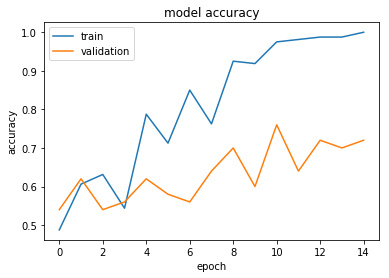

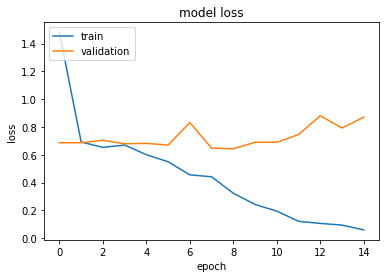

In [73]:
# summarize history for accuracy
plt.plot(result.history['acc'])
plt.plot(result.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(result.history['loss'])
plt.plot(result.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

In [74]:
from sklearn import metrics

prediction = model.predict(X_test)

def round_func(a):
  return float(a>= 0.5)
  
for i in range(prediction.shape[0]):
  prediction[i] = (round_func(prediction[i]))
#round_func(prediction[1])
  
Accuracy = metrics.accuracy_score(Y_test, prediction)
#confusion_
print(Accuracy)


0.6


Achieved a validation accuracy of 72% with the available data and 60% on test data. It appears that the model has overfitted as test accuracy is very much lesser than validation and training accuracy.
Let's see if Augmentaion and transfer learning help in improving the performance.


In [33]:
#Let's take the Solution1 approach to see if the performance improves.

#Augmented the data and put at 
#/content/drive/My Drive/Apron
#                             - Good_Aug
#                             - Defects_Aug


Aug_path1 = "/content/drive/My Drive/Apron/Good_Aug"
Aug_path2 = "/content/drive/My Drive/Apron/Defects_Aug"

Aug_listing1 = os.listdir(Aug_path1)
Aug_listing2 = os.listdir(Aug_path2)

Good_Aug = []
Defects_Aug = []
for lm in Aug_listing1:
  img = cv2.imread(Aug_path1+'/'+lm)  
  Good_Aug.append(cv2.resize(img, (256,256), interpolation = cv2.INTER_AREA))


for lm in Aug_listing2:
  img = cv2.imread(Aug_path2+'/'+lm)  
  Defects_Aug.append(cv2.resize(img, (256,256), interpolation = cv2.INTER_AREA))
  
  
Good_Aug = np.array(Good_Aug)
Defects_Aug = np.array(Defects_Aug)

for i in range(5):
  print(Good_Aug[i].shape)
  print(Defects_Aug[i].shape)

(256, 256, 3)
(256, 256, 3)
(256, 256, 3)
(256, 256, 3)
(256, 256, 3)
(256, 256, 3)
(256, 256, 3)
(256, 256, 3)
(256, 256, 3)
(256, 256, 3)


In [35]:
print(Good_Aug.shape, " ", Defects_Aug.shape)

(1220, 256, 256, 3)   (960, 256, 256, 3)



In [52]:
Dataset_Aug = np.append(Good_Aug, Defects_Aug, axis=0)


Dataset_Aug = Dataset_Aug.reshape(-1, 256, 256, 3)
Dataset_Aug = Dataset_Aug.astype('float32')
Dataset_Aug = Dataset_Aug/255.
print(Dataset_Aug.shape)

(2180, 256, 256, 3)


In [0]:
Labels_Aug = np.ones(Dataset_Aug.shape[0])
Labels_Aug[0:1220] = 0   #Assign label 0 to Good samples of Apron

Now, the Augmented Dataset is of 2180 images/samples. Let's train the model with these samples and check the performance of the model

In [75]:
#Split the data into training, validation and testing set

from sklearn.model_selection import train_test_split

X_train,X_val,Y_train,Y_val = train_test_split(Dataset_Aug,Labels_Aug,test_size=0.20,random_state=34)

X_train, X_test, Y_train, Y_test = train_test_split(X_train, Y_train, test_size=0.20, random_state=45)

print(X_train.shape, X_test.shape, X_val.shape)

(1395, 256, 256, 3) (349, 256, 256, 3) (436, 256, 256, 3)


In [0]:
learning_rate=0.001
num_classes = 2

#LeNET Architecture

model_Aug = keras.Sequential()
model_Aug.add(Conv2D(filters=6, kernel_size=(3, 3), activation='relu', input_shape=(256,256,3)))
model_Aug.add(AveragePooling2D())   
model_Aug.add(Conv2D(filters=16, kernel_size=(3, 3), activation='relu'))
model_Aug.add(AveragePooling2D())
model_Aug.add(Flatten())
model_Aug.add(Dense(units=120, activation='relu'))
model_Aug.add(Dense(units=60, activation='relu'))
model_Aug.add(Dense(units=1, activation = 'sigmoid'))      


#Defining the loss function and optimizers
model_Aug.compile(loss='binary_crossentropy', optimizer='Adam', metrics=['accuracy'])

In [88]:
class myCallback(tf.keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs={}):
    if(logs.get('acc')>=0.98):
      print("\nReached 98% accuracy so cancelling training!")
      self.model.stop_training = True

callbacks = myCallback()

result = model_Aug.fit(X_train, Y_train, validation_data=(X_val, Y_val), epochs=20, batch_size=64, callbacks=[callbacks])

Train on 1395 samples, validate on 436 samples
Epoch 1/20
1395/1395 [==============================] - 49s 35ms/step - loss: 1.2332 - acc: 0.5398 - val_loss: 0.8109 - val_acc: 0.4404
Epoch 2/20
1395/1395 [==============================] - 47s 34ms/step - loss: 0.6879 - acc: 0.5706 - val_loss: 0.6892 - val_acc: 0.5183
Epoch 3/20
1395/1395 [==============================] - 47s 34ms/step - loss: 0.6641 - acc: 0.6072 - val_loss: 0.6685 - val_acc: 0.5780
Epoch 4/20
1395/1395 [==============================] - 47s 34ms/step - loss: 0.6461 - acc: 0.6351 - val_loss: 0.6717 - val_acc: 0.5619
Epoch 5/20
1395/1395 [==============================] - 47s 34ms/step - loss: 0.6215 - acc: 0.6724 - val_loss: 0.6416 - val_acc: 0.6330
Epoch 6/20
1395/1395 [==============================] - 47s 34ms/step - loss: 0.5787 - acc: 0.7061 - val_loss: 0.6405 - val_acc: 0.6330
Epoch 7/20
1395/1395 [==============================] - 47s 34ms/step - loss: 0.5594 - acc: 0.7161 - val_loss: 0.7093 - val_acc: 0.5963
E

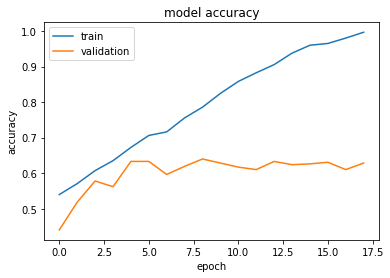

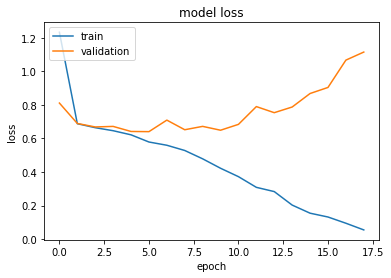

In [89]:
# summarize history for accuracy
plt.plot(result.history['acc'])
plt.plot(result.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(result.history['loss'])
plt.plot(result.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

In [90]:
prediction_Aug = model_Aug.predict(X_test)

def round_func(a):
  return float(a>= 0.5)
  
for i in range(prediction_Aug.shape[0]):
  prediction_Aug[i] = (round_func(prediction_Aug[i]))
#round_func(prediction[1])
  
Accuracy_Aug = metrics.accuracy_score(Y_test, prediction_Aug)
#confusion_
print(Accuracy_Aug)

0.6246418338108882


Augmentation doesn't look to improve the performance. Let's try out transfer learning.

Chose Mobilenet_V2 as it takes 14MB for the weights as per the keras Documentation(link below).

https://keras.io/applications/#mobilenetv2

In [49]:
# # Transfer learning

from keras.preprocessing import image
from keras.applications import mobilenet_v2
from keras.applications.mobilenet_v2 import preprocess_input
from keras.layers import GlobalAveragePooling2D

conv_model = mobilenet_v2.MobileNetV2(weights= 'imagenet', include_top = False, input_shape = (256,256,3))

/usr/local/lib/python3.6/dist-packages/keras_applications/mobilenet_v2.py:294: UserWarning: `input_shape` is undefined or non-square, or `rows` is not in [96, 128, 160, 192, 224]. Weights for input shape (224, 224) will be loaded as the default.
  warnings.warn('`input_shape` is undefined or non-square, '


In [0]:
x=conv_model.output
x=GlobalAveragePooling2D()(x)
x=Dense(1024,activation='relu')(x) #we add dense layers so that the model can learn more complex functions and classify for better results.
x=Dense(512,activation='relu')(x) #dense layer 2
x=Dense(120,activation='relu')(x) #dense layer 3
preds = Dense(1,activation='sigmoid')(x) #final layer with sigmoid activation as it is a binary classification 

In [0]:
from keras.models import Model
model= Model(inputs=conv_model.input,outputs=preds)

In [0]:
# for i,layer in enumerate(model.layers):
#   print(i,layer.name)

In [0]:
# We want to set the first 50 layers of the network to be non-trainable and change the weights of the rest of the layers.
for layer in model.layers[:50]:
    layer.trainable=False
for layer in model.layers[50:]:
    layer.trainable=True

In [60]:
train_datagen=ImageDataGenerator(preprocessing_function=preprocess_input, 
                                 horizontal_flip=True, width_shift_range=0.1, 
                                 height_shift_range=0.1, rotation_range=5,
                                 brightness_range=[0.75,1.25])                               

train_generator=train_datagen.flow_from_directory('/content/drive/My Drive/Apron/Train',
                                                 target_size=(256,256),
                                                 color_mode='rgb',
                                                 batch_size=16,
                                                 class_mode='binary',
                                                 shuffle=True)

Found 210 images belonging to 2 classes.


In [62]:
model.compile(optimizer='Adam',loss=keras.losses.binary_crossentropy, metrics=['accuracy'])
# Adam optimizer
# loss function will be categorical cross entropy
# evaluation metric will be accuracy

step_size_train=train_generator.n//train_generator.batch_size
model.fit_generator(generator=train_generator,
                   steps_per_epoch=step_size_train,
                   epochs=10, callbacks=[callbacks])

Epoch 1/10
13/13 [==============================] - 84s 6s/step - loss: 0.3066 - acc: 0.9178
Epoch 2/10
13/13 [==============================] - 78s 6s/step - loss: 0.1983 - acc: 0.9227
Epoch 3/10
13/13 [==============================] - 78s 6s/step - loss: 0.9046 - acc: 0.9059
Epoch 4/10
13/13 [==============================] - 84s 6s/step - loss: 0.3782 - acc: 0.9279
Epoch 5/10
13/13 [==============================] - 72s 6s/step - loss: 0.1998 - acc: 0.9396
Epoch 6/10
13/13 [==============================] - 78s 6s/step - loss: 0.3779 - acc: 0.8940
Epoch 7/10
13/13 [==============================] - 83s 6s/step - loss: 0.2981 - acc: 0.9087
Epoch 8/10
13/13 [==============================] - 72s 6s/step - loss: 0.4275 - acc: 0.8500
Epoch 9/10
13/13 [==============================] - 78s 6s/step - loss: 0.3044 - acc: 0.8840
Epoch 10/10
13/13 [==============================] - 84s 6s/step - loss: 0.1673 - acc: 0.9567


In [65]:
from sklearn import metrics

prediction = model.predict(preprocess_input(X_test))

#print(prediction[0])


[7.119775e-05]


In [66]:
def round_func(a):
  return float(a>= 0.5)
  
for i in range(prediction.shape[0]):
  prediction[i] = (round_func(prediction[i]))
#round_func(prediction[1])
  
Accuracy = metrics.accuracy_score(Y_test, prediction)
#confusion_
print(Accuracy)

0.6
